<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/polynomial_logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [27]:
df=pd.read_csv("/content/archive (15).zip")
df.sample(5)

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
81,1.290037,-0.206914,1.0
75,0.346650,1.115707,0.0
15,0.301245,1.233157,0.0
47,-1.024655,0.161902,0.0
93,1.170376,0.598407,0.0


In [28]:
df = df.rename(columns={'3.159499363321345566e-02':'x', '9.869877579082642072e-01':'y', '0.000000000000000000e+00':'output'})
df = df.loc[:,~df.columns.duplicated()]
df.sample(5)

,x,y,output
29,0.474047,-0.145751,1.0
51,0.721552,0.447217,0.0
7,-0.029221,0.392873,1.0
60,-0.372278,0.992913,0.0
25,0.605852,0.312528,0.0


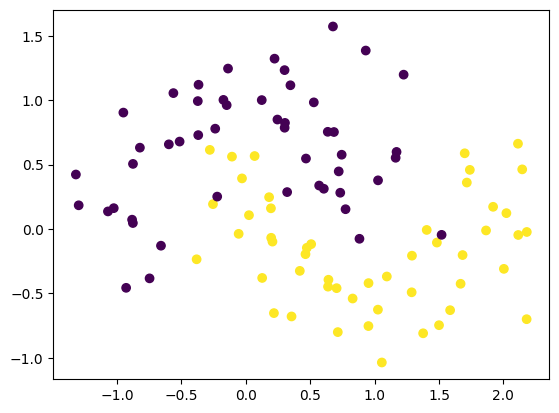

In [29]:
plt.scatter(df['x'],df['y'] , c=df['output'])

In [30]:
from sklearn.model_selection import train_test_split


x = df[['x', 'y']]
y = df['output']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [31]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: >

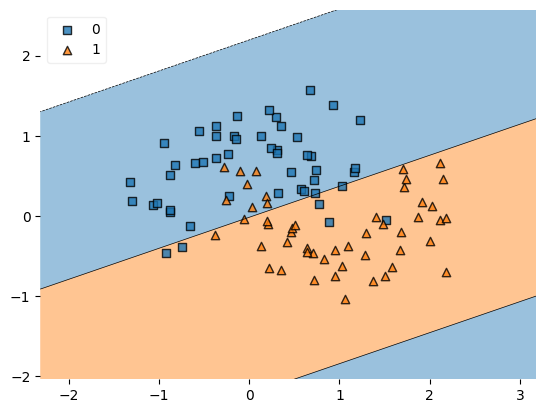

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.astype(int).values, clf=model, legend=2)

In [38]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred > 0.5)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


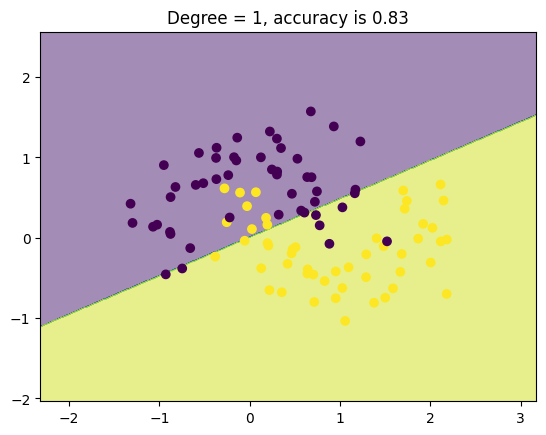

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

plot_decision_boundary(x.values,y.astype(int).values)

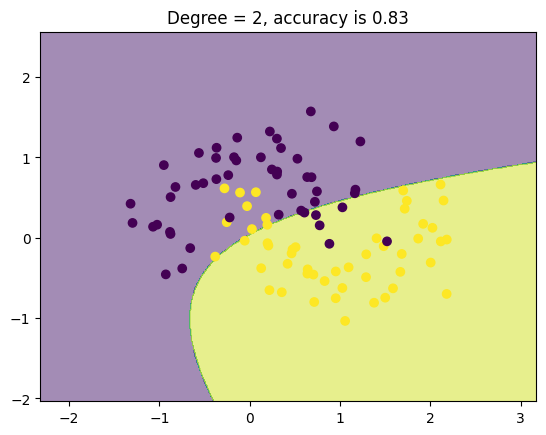

In [41]:
plot_decision_boundary(x.values,y.astype(int).values,degree=2)

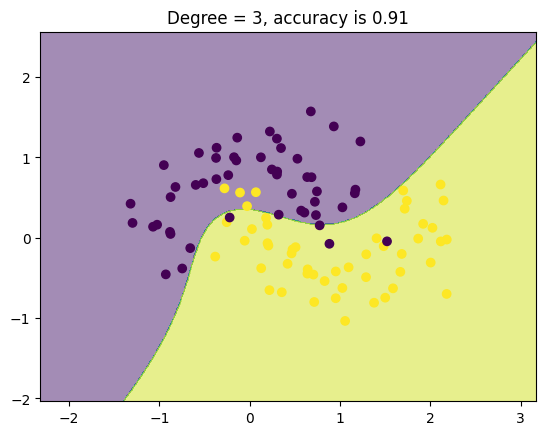

In [42]:
plot_decision_boundary(x.values,y.astype(int).values,degree=3)

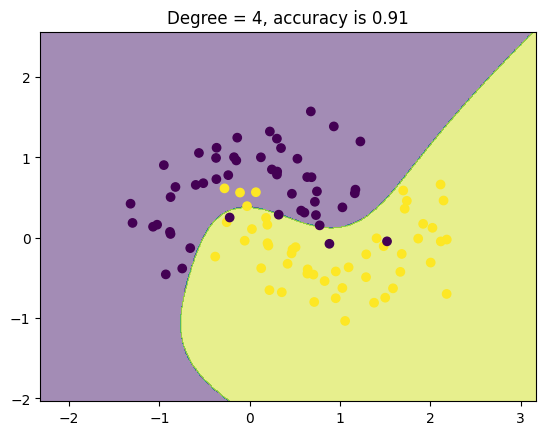

In [43]:
plot_decision_boundary(x.values,y.astype(int).values,degree=4)

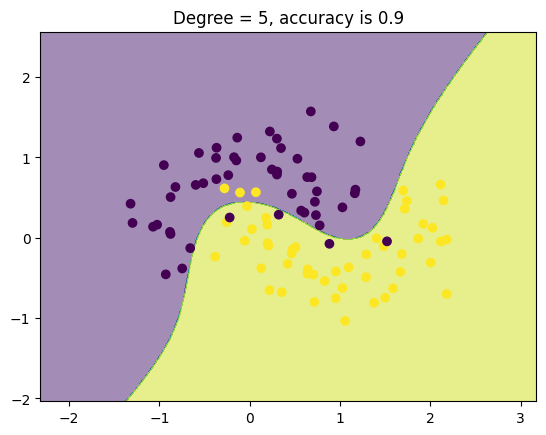

In [45]:
plot_decision_boundary(x.values,y.astype(int).values,degree=5)

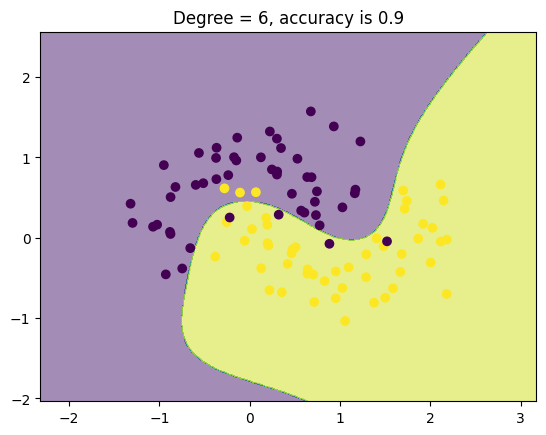

In [44]:
plot_decision_boundary(x.values,y.astype(int).values,degree=6)